In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('metadata.csv', index_col=0)
df

cellnames cellids grouping  time_continuous  time_discrete
C1           C1      C1       M6         0.977978              4
C10          C2     C10       M2         1.056426              5
C100         C3    C100       M4         0.445866              2
C1000        C4   C1000       M6         0.977978              4
C1001        C5   C1001       M2         1.056426              5
...         ...     ...      ...              ...            ...
C995      C4973    C995       M9         1.905800              8
C996      C4974    C996       M3         0.108084              1
C997      C4975    C997       M9         2.098884              9
C998      C4976    C998       M3         0.078169              1
C999      C4977    C999       M6         0.988234              4

[4945 rows x 5 columns]

In [3]:
# c = df['U']
g = df['grouping'].tolist()
set(g)

{'M1', 'M10', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'}

In [4]:
types = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10']
# types = list(set(g))
types

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10']

In [5]:
cellnames = df['cellnames'].tolist()
cellids = df['cellids'].tolist()

In [6]:
labels = [types.index(g[cellids.index(name)])+1 for name in cellnames]

In [7]:
pd.DataFrame(labels).to_csv('labels.csv', header=False, index=False)

In [8]:
data_df = pd.read_csv('data.csv', header='infer', index_col=0)
data_df

G1   G2        G3        G4        G5        G6        G7  \
C1     0.000000  0.0  0.000000  1.382834  6.469644  0.000000  0.000000   
C2     0.000000  0.0  0.000000  0.000000  0.000000  6.275954  0.000000   
C3     2.684682  0.0  0.000000  2.207766  0.000000  0.000000  0.000000   
C4     0.000000  0.0  0.000000  2.958873  5.465702  0.000000  2.958873   
C5     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...  ...       ...       ...       ...       ...       ...   
C4973  0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
C4974  3.548414  0.0  1.130185  0.000000  5.703802  0.000000  0.000000   
C4975  0.000000  0.0  0.000000  0.000000  5.967332  0.000000  3.212601   
C4976  0.860672  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
C4977  0.000000  0.0  3.655676  0.000000  5.028749  5.933661  0.000000   

             G8        G9       G10  ...     G3861     G3862     G3863  \
C1     0.000000  0.000000  4.094068  ...  1.382834  3.412348  0.000000   
C2     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
C3     0.000000  0.000000  6.143173  ...  0.000000  3.192839  0.000000   
C4     0.000000  0.000000  0.000000  ...  0.000000  0.000000  4.414507   
C5     0.000000  3.506302  5.368121  ...  0.000000  0.000000  6.410364   
...         ...       ...       ...  ...       ...       ...       ...   
C4973  0.000000  0.000000  6.067623  ...  0.000000  0.000000  0.000000   
C4974  0.000000  0.000000  5.670514  ...  0.000000  0.000000  0.000000   
C4975  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
C4976  0.000000  0.000000  4.962906  ...  0.000000  0.000000  0.000000   
C4977  3.771635  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

          G3864  G3865     G3866     G3867  G3868     G3869  G3870  
C1     2.728422    0.0  0.000000  4.696044    0.0  0.000000    0.0  
C2     0.000000    0.0  0.000000  0.000000    0.0  3.030516    0.0  
C3     0.000000    0.0  0.000000  0.000000    0.0  0.000000    0.0  
C4     0.000000    0.0  0.885102  0.000000    0.0  0.000000    0.0  
C5     0.000000    0.0  0.000000  0.000000    0.0  5.722908    0.0  
...         ...    ...       ...       ...    ...       ...    ...  
C4973  0.000000    0.0  3.133085  0.000000    0.0  0.000000    0.0  
C4974  0.000000    0.0  0.000000  3.932290    0.0  4.884248    0.0  
C4975  2.703426    0.0  0.000000  0.000000    0.0  0.000000    0.0  
C4976  0.000000    0.0  0.000000  0.000000    0.0  5.000162    0.0  
C4977  0.000000    0.0  3.391386  0.000000    0.0  2.873580    0.0  

[4945 rows x 3870 columns]

In [9]:
data = np.array(data_df)

In [10]:
from sklearn.decomposition import PCA
data = PCA(n_components=30).fit_transform(data)

In [11]:
data.shape

(4945, 30)

In [12]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(data)

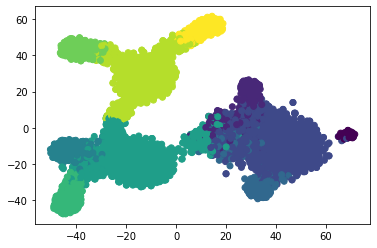

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)